# MLE for Normal Distribution

Let's work on how we can find MLE under normal distribution. 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
#import required libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

For this case, let's generate a synthetic sample of size n=100 from N(0,1). 

In [13]:
#let's generate a synthetic observed sample
data = stats.norm.rvs(loc = 0, scale = 1, size = 100)
n = np.size(data) 

Since we a parameter vector ($\mu$ and $\sigma^2$) now, we will create 3D plot where X-axis will be for possible $\mu$ values, Y-axis will be for possible $\sigma^2$ values, and Z-axis will be the corresponding log-likelihood value for the sample under given $\mu$ and $\sigma^2$.

In [14]:
# Generate a meshgrid 
# A vector grid for possible mu values
mu_values = np.arange(-10,10,1)
# A vector grid for possible sigma2 values
sigma2_values = np.arange(0.1,2,0.1)
# Create coordinate points of X and Y
X, Y = np.meshgrid(mu_values, sigma2_values)

Calculate the loglikelihood value of normal distribution for each possible $\mu$ and $\sigma^2$.

In [15]:
# Estimate the log-lik function of normal distribution for each point mu and sigma2 value in the meshgrid
loglik = np.zeros(X.shape)
for i in range(X.shape[0]):  
    for j in range(X.shape[1]): 
        loglik[i,j] = -(n/2)*np.log(2*math.pi*Y[i,j])-(1/(2*Y[i,j]))*np.sum((data-X[i,j])**2)

In [10]:
#double check for loop calculations
#loglikfake = -(n/2)*np.log(2*math.pi*sigma2_values[0])-(1/(2*sigma2_values[0]))*np.sum((data-mu_values[0])**2)
#loglikfake

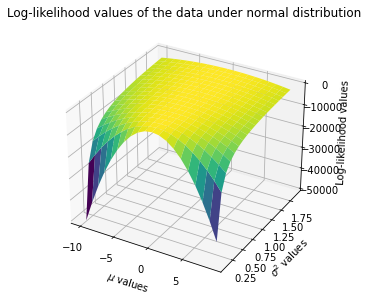

In [16]:
# Plotting the log-lik values
fig = plt.figure(figsize=plt.figaspect(5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, loglik, cmap = 'viridis')
plt.xlabel(r'$\mu$ values')
plt.ylabel(r'$\sigma^2$ values')
plt.title('Log-likelihood values of the data under normal distribution')
ax.set_zlabel('Log-likelihood values', rotation=80)
ax.set_zlim(-50000, 0) #limits are manually set
plt.tight_layout()
plt.show()